### First, we find the days with less than two contributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
contributions = pd.read_csv('contributions.csv')
contributions["Day"]=pd.to_datetime(contributions["Day"],format='%Y-%m-%d') #We convert time (as str) to datetime

In [4]:
day_range = pd.date_range(start=pd.to_datetime(contributions.iloc[0][0],format='%Y-%m-%d'),end=pd.to_datetime(contributions.iloc[-1][0],format='%Y-%m-%d'))

In [36]:
#For each day we check if it's not in the data set (0 contributions) or is in the data set but has only one contribution
dayInfTwo=[]
for day in day_range:
    s=contributions["Day"].isin([str(day)])
    if(len(s[s].index)==0):
        dayInfTwo.append(str(day)[0:10])
    elif(len(s[s].index)==1):
        nbr=contributions[contributions["Day"]==day]["Total"]
        if(nbr.iloc[0]==1):
            dayInfTwo.append(str(day)[0:10])
dayI

### Then, we plot the activity ~ contributors 

In [37]:
contributors = pd.read_csv('contributors.csv')

In [35]:
#We group the contributers together if they have the same number of contributions
contributorsByNumb = contributors.groupby(["contributions"]).count().reset_index().rename(columns={'User_ID':'numberUsers'})

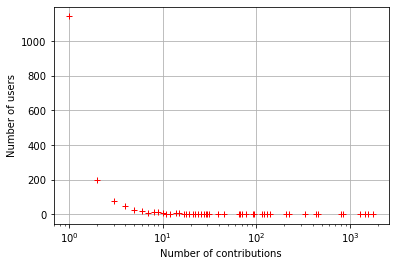

In [11]:
plt.semilogx(contributorsByNumb["contributions"],contributorsByNumb["numberUsers"], 'r+')
plt.xlabel("Number of contributions")
plt.ylabel("Number of users")
plt.grid(True)

### Bonus : temporal evolution

In [57]:
#We add a column with the number of the week
contributions["week"]=0
for i in range(len(contributions)):
    contributions["week"].iloc[i]=contributions["Day"].iloc[i].week+contributions["Day"].iloc[i].year*52

In [58]:
#then we group to get all contributions per week
contributions_per_week = contributions.groupby("week").sum()

In [59]:
contributions_per_week 

,Total
week,
104945,11
104946,1
104947,19
104948,24
104949,32
...,...
105082,21
105083,14
105084,10


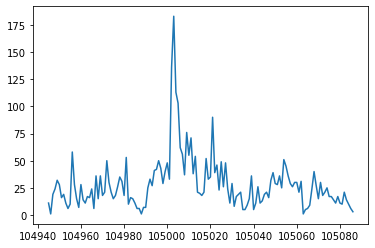

In [60]:
plt.plot(contributions_per_week)

In [61]:
contributions_per_week=contributions_per_week.reset_index()


In [66]:
#Maximum is 15th week of 2019 aka april 2019
contributions_per_week[contributions_per_week["week"]==105003]

,week,Total
58,105003,183


In [71]:
#Early August patchnote 16.9.0 biggest update of the year